In [ ]:
# Install necessary libraries (only needed once)
!pip install textblob
!python -m textblob.download_corpora

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [ ]:
df = pd.read_csv('student_feedback.csv')
df

,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9
...,...,...,...,...,...,...,...,...,...,...
996,996,55,8,7,6,2,5,7,7,9
997,997,913,5,5,6,5,6,7,6,1
998,998,199,9,5,8,3,8,1,1,2
999,999,539,10,2,7,4,3,4,10,1


In [ ]:
# Drop unnecessary columns
df_cleaned = df.drop(columns=["Unnamed: 0", "Student ID"])

# Check if any missing values exist
df_cleaned.isnull().sum()


,0
Well versed with the subject,0
Explains concepts in an understandable way,0
Use of presentations,0
Degree of difficulty of assignments,0
Solves doubts willingly,0
Structuring of the course,0
Provides support for students going above and beyond,0
Course recommendation based on relevance,0


In [ ]:
# Get average and distribution of ratings
df_cleaned.describe()


,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance,Overall Satisfaction
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,7.497502,6.081918,5.942058,5.430569,5.474525,5.636364,5.662338,5.598402,5.915460
std,1.692998,2.597168,1.415853,2.869046,2.874648,2.920212,2.891690,2.886617,0.894734
min,5.000000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.375000
25%,6.000000,4.000000,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000,5.250000
50%,8.000000,6.000000,6.000000,5.000000,6.000000,6.000000,6.000000,6.000000,5.875000
75%,9.000000,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,8.000000,6.625000
max,10.000000,10.000000,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000,8.250000


<ipython-input-11-3322664457>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_scores.values, y=mean_scores.index, palette='viridis')


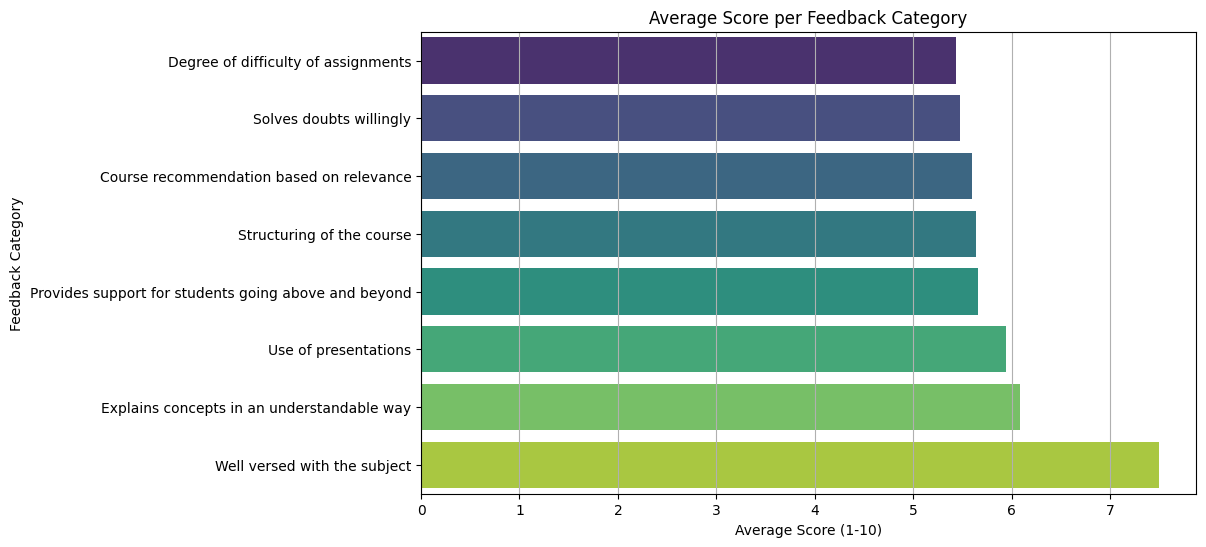

In [ ]:
# Calculate mean scores
mean_scores = df_cleaned.mean().sort_values()

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=mean_scores.values, y=mean_scores.index, palette='viridis')
plt.title("Average Score per Feedback Category")
plt.xlabel("Average Score (1-10)")
plt.ylabel("Feedback Category")
plt.grid(axis='x')
plt.show()


In [ ]:
correlation_matrix = df_cleaned.corr()
correlation_matrix


,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance,Overall Satisfaction
Well versed with the subject,1.000000,0.008916,-0.024674,-0.007087,-0.056981,-0.027490,0.031488,-0.015143,0.204551
Explains concepts in an understandable way,0.008916,1.000000,-0.012305,0.029484,-0.025839,0.012766,-0.003237,0.008528,0.371296
Use of presentations,-0.024674,-0.012305,1.000000,0.020918,-0.036972,-0.020097,-0.014798,0.023173,0.176207
Degree of difficulty of assignments,-0.007087,0.029484,0.020918,1.000000,0.009637,-0.053624,-0.002949,-0.005181,0.392695
Solves doubts willingly,-0.056981,-0.025839,-0.036972,0.009637,1.000000,0.036062,0.006543,-0.000511,0.392453
Structuring of the course,-0.027490,0.012766,-0.020097,-0.053624,0.036062,1.000000,-0.027819,-0.010224,0.379754
Provides support for students going above and beyond,0.031488,-0.003237,-0.014798,-0.002949,0.006543,-0.027819,1.000000,-0.031117,0.384881
Course recommendation based on relevance,-0.015143,0.008528,0.023173,-0.005181,-0.000511,-0.010224,-0.031117,1.000000,0.388351
Overall Satisfaction,0.204551,0.371296,0.176207,0.392695,0.392453,0.379754,0.384881,0.388351,1.000000


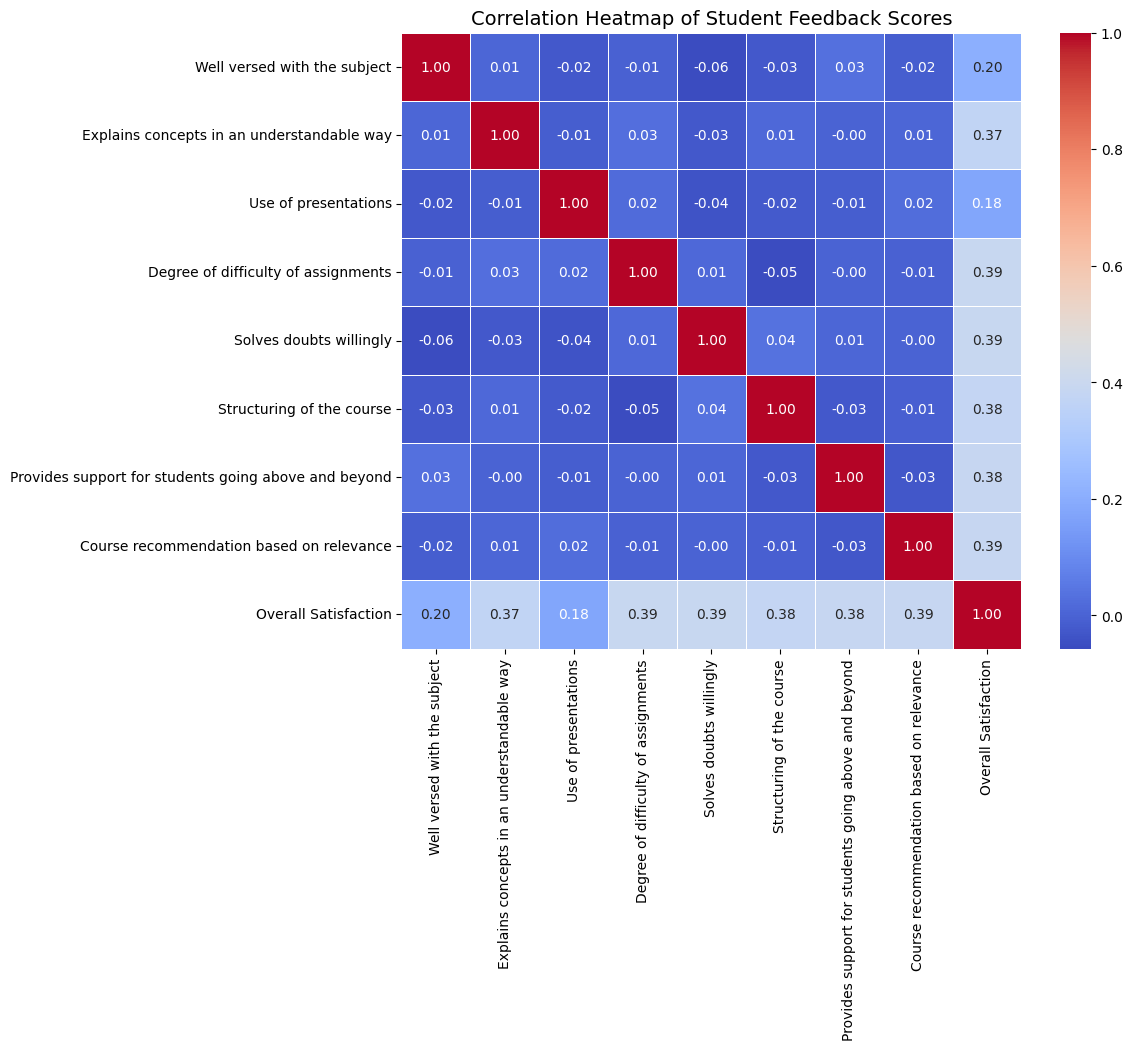

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title("Correlation Heatmap of Student Feedback Scores", fontsize=14)
plt.show()


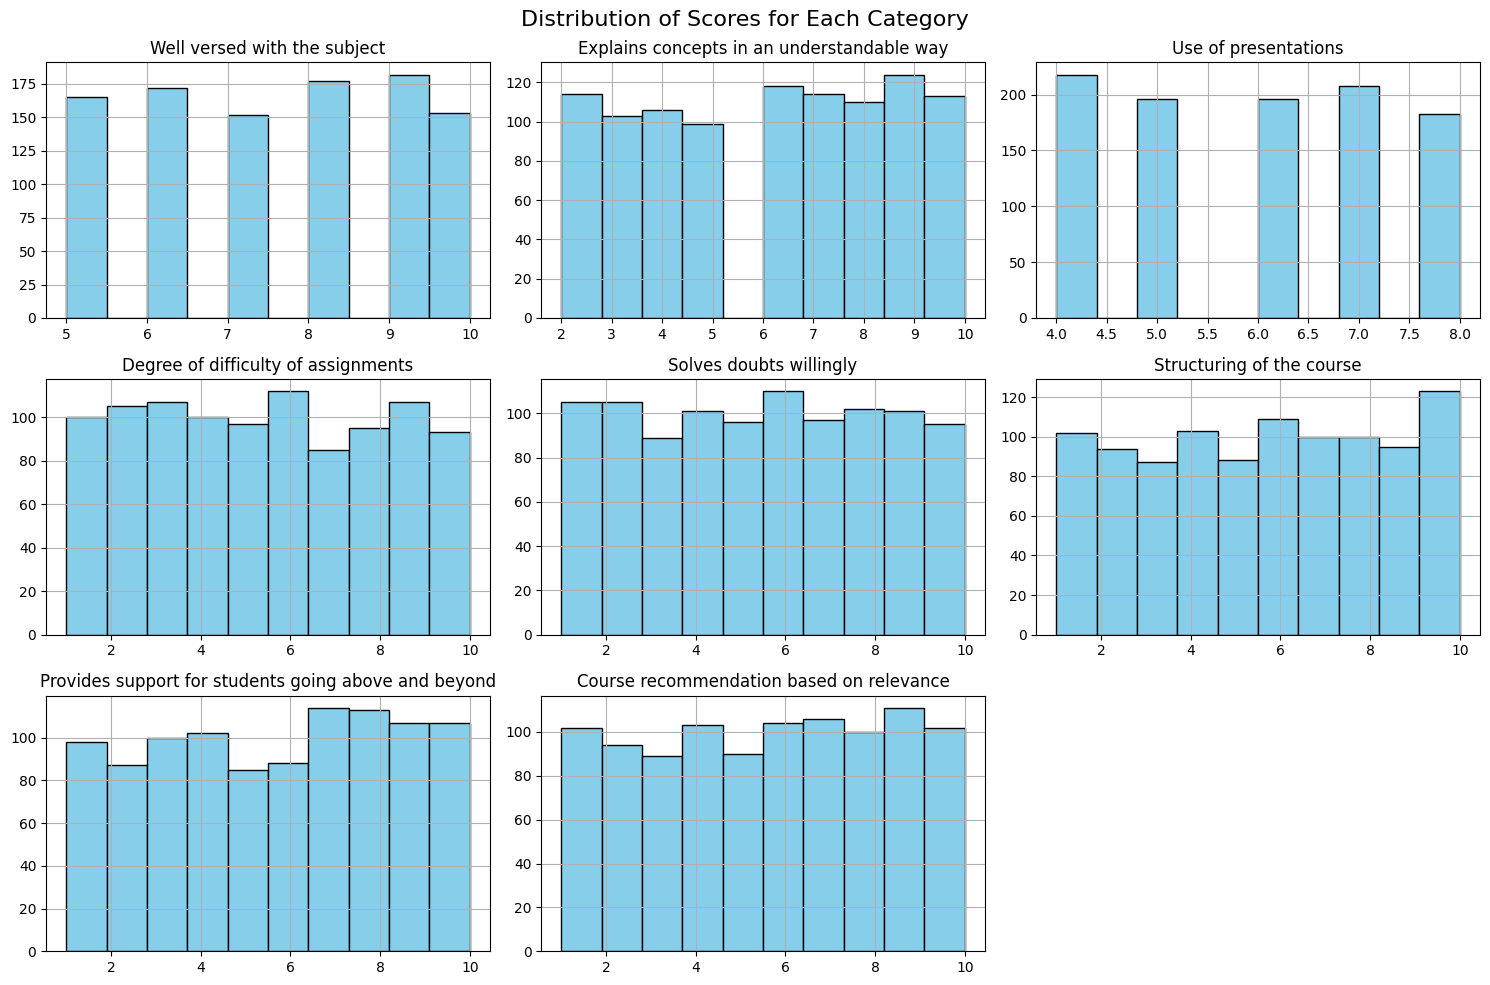

In [ ]:
df_cleaned.hist(bins=10, figsize=(15,10), layout=(3,3), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Scores for Each Category", fontsize=16)
plt.tight_layout()
plt.show()


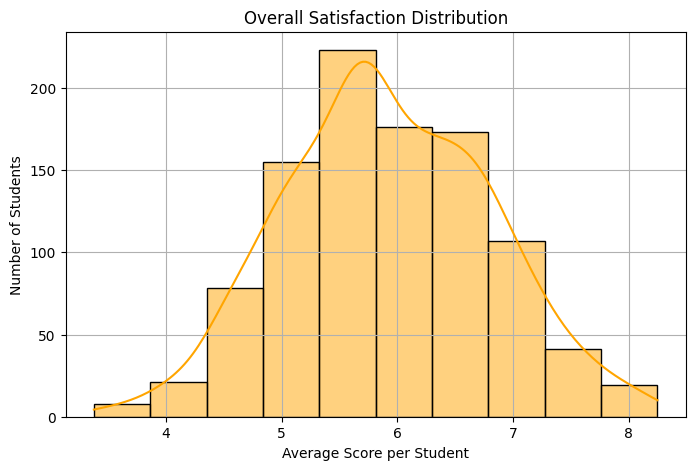

In [ ]:
df_cleaned["Overall Satisfaction"] = df_cleaned.mean(axis=1)

# Plot overall satisfaction distribution
plt.figure(figsize=(8,5))
sns.histplot(df_cleaned["Overall Satisfaction"], bins=10, kde=True, color='orange')
plt.title("Overall Satisfaction Distribution")
plt.xlabel("Average Score per Student")
plt.ylabel("Number of Students")
plt.grid(True)
plt.show()


In [ ]:
# First, check for a column with comments
df.columns  # Look for a column like 'Comments', 'Feedback', or similar


Index(['Unnamed: 0', 'Student ID', 'Well versed with the subject',
       'Explains concepts in an understandable way', 'Use of presentations',
       'Degree of difficulty of assignments', 'Solves doubts willingly',
       'Structuring of the course',
       'Provides support for students going above and beyond',
       'Course recommendation based on relevance'],
      dtype='object')

In [ ]:
df.columns.tolist()


['Unnamed: 0',
 'Student ID',
 'Well versed with the subject',
 'Explains concepts in an understandable way',
 'Use of presentations',
 'Degree of difficulty of assignments',
 'Solves doubts willingly',
 'Structuring of the course',
 'Provides support for students going above and beyond',
 'Course recommendation based on relevance']

In [23]:
from IPython.display import Markdown
Markdown("""
# 📊 Student Feedback Analysis Report

This project analyzes feedback from 1,001 students who rated various aspects of a course or instructor on a scale from 1–10. It uses Python libraries such as `pandas`, `seaborn`, and `matplotlib` to uncover key insights and areas for improvement.

---

## 🔍 Summary

- **Highest rated**: *Well versed with the subject* – Avg. score: 7.50
- **Lowest rated**: *Assignment difficulty* – Avg. score: 5.43
- **Key concern**: Communication clarity and presentation delivery
- **Strong positive correlations** between clarity, support, and course recommendation

---

## 📈 Visualizations Included

- Bar Chart (Average Ratings)
- Histogram (Score Distributions)
- Box Plot (Data Spread)
- Line Chart (Trend Across Categories)
- Correlation Heatmap (Relationships Between Ratings)

---

## ✅ Recommendations

1. **Maintain strong subject delivery** – This is your top-rated strength.
2. **Improve explanation clarity** – Use analogies, examples, and slower pacing.
3. **Standardize assignment difficulty** – Balance challenge and clarity.
4. **Enhance visual tools** – Upgrade presentation style.
5. **Provide more student support** – Offer more office hours and Q&A time.
6. **Refine course structure** – Organize content to improve flow.

---

## 🛠 Tools Used

| Tool       | Purpose                    |
|------------|-----------------------------|
| Google Colab | Cloud-based Python notebook |
| pandas     | Data manipulation           |
| seaborn/matplotlib | Data visualization      |
| Heatmap    | Correlation analysis        |

---

## 📌 Project Goals

- Identify satisfaction trends
- Use data to support teaching improvement
- Build a clean, visual report for stakeholders

---

## 📎 Files

- `student_feedback.csv` – Cleaned dataset
- `notebook.ipynb` – Python code (in Google Colab)

""")



# 📊 Student Feedback Analysis Report

This project analyzes feedback from 1,001 students who rated various aspects of a course or instructor on a scale from 1–10. It uses Python libraries such as `pandas`, `seaborn`, and `matplotlib` to uncover key insights and areas for improvement.

---

## 🔍 Summary

- **Highest rated**: *Well versed with the subject* – Avg. score: 7.50
- **Lowest rated**: *Assignment difficulty* – Avg. score: 5.43
- **Key concern**: Communication clarity and presentation delivery
- **Strong positive correlations** between clarity, support, and course recommendation

---

## 📈 Visualizations Included

- Bar Chart (Average Ratings)
- Histogram (Score Distributions)
- Box Plot (Data Spread)
- Line Chart (Trend Across Categories)
- Correlation Heatmap (Relationships Between Ratings)

---

## ✅ Recommendations

1. **Maintain strong subject delivery** – This is your top-rated strength.
2. **Improve explanation clarity** – Use analogies, examples, and slower pacing.
3. **Standardize assignment difficulty** – Balance challenge and clarity.
4. **Enhance visual tools** – Upgrade presentation style.
5. **Provide more student support** – Offer more office hours and Q&A time.
6. **Refine course structure** – Organize content to improve flow.

---

## 🛠 Tools Used

| Tool       | Purpose                    |
|------------|-----------------------------|
| Google Colab | Cloud-based Python notebook |
| pandas     | Data manipulation           |
| seaborn/matplotlib | Data visualization      |
| Heatmap    | Correlation analysis        |

---

## 📌 Project Goals

- Identify satisfaction trends
- Use data to support teaching improvement
- Build a clean, visual report for stakeholders

---

## 📎 Files

- `student_feedback.csv` – Cleaned dataset
- `notebook.ipynb` – Python code (in Google Colab)

